Reference: https://www.tensorflow.org/tutorials/mnist/beginners/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data loading

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
input_dim = 784
output_dim = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Data visualization

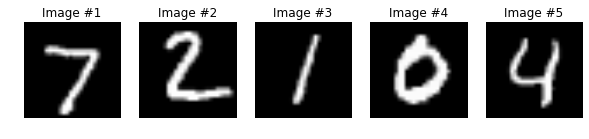

In [3]:
no_plot_img = 5
plt.rcParams['figure.figsize'] = (10, 2)
fig, ax_list = plt.subplots(1, no_plot_img)
for i in range(no_plot_img):
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    label = np.argmax(mnist.test.labels[i])
    ax_list[i].set_title('Image #%d'%(i+1))
    ax_list[i].axis('off')
    ax_list[i].imshow(pixels, cmap='gray')
plt.show()

# Design

In [4]:
x  = tf.placeholder(tf.float32, [None, input_dim])
y  = tf.placeholder(tf.float32, [None, output_dim])
w = tf.Variable(tf.zeros([input_dim, output_dim]))
b = tf.Variable(tf.zeros([1]))

hypothesis = tf.matmul(x, w) + b
prob = tf.nn.softmax(hypothesis)
prediction = tf.argmax(prob, axis=1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training and visualization

iter	loss	accuracy
1	1.631	0.411
100	0.282	0.893
200	0.371	0.903
300	0.258	0.907
400	0.290	0.902
500	0.466	0.909
600	0.223	0.918
700	0.240	0.916
800	0.235	0.913
900	0.241	0.915
1000	0.249	0.917


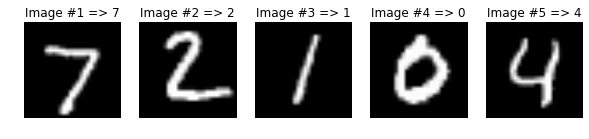

In [5]:
optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.5))
train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Fit the model
    sess.run(init)
    print('iter\tloss\taccuracy')
    for i in xrange(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train_op, feed_dict={x:batch_x, y:batch_y})
        if ((i+1) % 100 == 0) or i == 0:
            loss_val = sess.run(loss, feed_dict={x:batch_x, y:batch_y})
            accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print('%d\t%.3f\t%.3f'%(i+1, loss_val, accuracy_val))
        
    # Print the results
    prediction_val = sess.run(prediction, feed_dict={x:mnist.test.images, y:mnist.test.labels})
    no_plot_img = 5
    plt.rcParams['figure.figsize'] = (10, 2)
    fig, ax_list = plt.subplots(1, no_plot_img)
    for i in range(no_plot_img):
        pixels = mnist.test.images[i]
        pixels = pixels.reshape((28, 28))
        label = prediction_val[i]
        ax_list[i].set_title('Image #%d => %d'%(i+1, label))
        ax_list[i].axis('off')
        ax_list[i].imshow(pixels, cmap='gray')
    plt.show()